## Networks

- Insights:
	- Important entities: influencers in social network
	- Pathfinding: most efficient transport path
	- Clustering: finding communities

<img src='./IMAGES/network-structure.PNG'>

## NetworkX API basics

~~~
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from([1, 2, 3])
print(G.nodes())  # [1, 2, 3]

G.add_edge(1,2)
print(G.edges())  # [(1,2)]

G.node[1]['label'] = 'blue'
print(G.nodes(data=True))

nx.draw(G)
plt.show()
~~~

## Undirected graphs

- The edges do not have an inherent directionality associated with them

~~~
G = nx.Graph()
~~~

## Directed graphs

~~~
D = nx.DiGraph()
~~~

## Multi-edge (directed) graphs

~~~
M = nx.MultiGraph()

MD = nx.MultiDiGraph()
~~~

## Weights on graphs

- Edges can contain weights

## Self-loops

- Nodes that are connected to themselves

___

~~~
# Set the weight of the edge
T.edges[1,10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1
~~~

## Visualizing networks

- Matrix plots
	- In an undirected graph, the matrix is symmetric around the main diagonal

<img src='./IMAGES/matrix-plot.PNG'>

- Arc plots

<img src='./IMAGES/arc-plot.PNG'>

- Circos plots
	- transformation of the arc plot, so that the two ends are connected, forming a circle

<img src='./IMAGES/circos-plot.PNG'>

## `nxviz` API

~~~
import nxviz as nv
import matplotlib.pyplot as plt

ap = nv.ArcPlot(G)

ap.draw()
plt.show()
~~~

***

~~~
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
~~~


## Degree centrality

- Definition: $\displaystyle\frac{\textrm{Number of neighbours I have}}{\textrm{Number of neighbours I could possibly have}}$

- If self-loops are allowed: denominator = number of nodes
- Otherwise: denominator = number of nodes - 1

~~~
nx.degree_centrality(G)
# returns a dict
# self-loops not considered
~~~

## Number of neighbors

~~~
G.neighbors(1)
# returns a list
~~~

## Breadth-first search (BFS)

~~~

def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False
~~~

## All shortest paths

- Set of paths
- Each path is shortest path between a given pair of nodes
- Done for all node pairs

## Betweenness centrality

- Definition: $\displaystyle\frac{\textrm{num. shortest paths through node}}{\textrm{all possible shortest paths}}$

~~~
import networkx as nx

G = nx.barbell_graph(m1=5, m2=1)
# m1: nodes in the ends
# m2: nodes in the bridge

nx.betweenness_centrality(G)
# returns a dict
~~~

<img src='./IMAGES/barbell-graph.png'>


## Cliques

- Social cliques: tightly-knit groups
- Simplest complex clique: a triangle

~~~
from itertools import combinations

for n1, n2 in combinations(G.nodes(), 2):
	print(n1, n2)
~~~

## Maximal cliques

- A clique that, when extended by one node, is no longer a clique

- `nx.find_cliques(G)` finds all **maximal** cliques


In [1]:
import networkx as nx

In [2]:
G = nx.barbell_graph(m1=5, m2=1)

print(list(nx.find_cliques(G)))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]


## Subgraphs

- Visualize portions of a large graph
	- Paths
	- Communities/cliques
	- Degrees of separation from a node


In [3]:
import matplotlib.pyplot as plt

In [4]:
G = nx.erdos_renyi_graph(n=20, p=0.2)

nodes = list(G.neighbors(8))
nodes.append(8)

G_eight = G.subgraph(nodes)
print(G_eight.edges())

#nx.draw(G_eight, with_labels=True)
#plt.show()

[(3, 8), (7, 8), (8, 14), (8, 15)]


In [8]:
github = nx.read_gpickle('./DATASETS/github_users.p')

For more about reading graphs from pickle files, see [this link](https://stackoverflow.com/questions/52027292/construct-networkx-graph-from-p-picked-file).

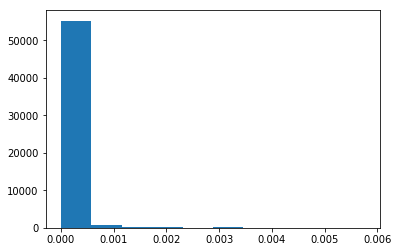

In [9]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(github).values()))
plt.show()

In [ ]:
# Plot the degree distribution of the GitHub collaboration network
#plt.hist(list(nx.betweenness_centrality(github).values()))
#plt.show()

nx.draw(github)
plt.show()

In [13]:
G = nx.erdos_renyi_graph(n=100, p=0.03)

print(list(nx.connected_component_subgraphs(G)))

[<networkx.classes.graph.Graph object at 0x000001EE51E6E940>, <networkx.classes.graph.Graph object at 0x000001EE51E6E978>, <networkx.classes.graph.Graph object at 0x000001EE51E6E2B0>, <networkx.classes.graph.Graph object at 0x000001EE51E6E9B0>, <networkx.classes.graph.Graph object at 0x000001EE512E06D8>]
